In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from py2neo import Graph

In [2]:

# Sample data: latitude, longitude, and some additional information
data = {
    'Latitude': [37.7749, 34.0522, 40.7128, 41.8781],
    'Longitude': [-122.4194, -118.2437, -74.0060, -87.6298],
    'City': ['San Francisco', 'Los Angeles', 'New York', 'Chicago']
}

In [3]:
graph = Graph('bolt://localhost:7687', auth = ('neo4j', 'neo4jneo4j'))

In [4]:
company_name = "Millicom International Cellular SA"

In [5]:
query = f"""
MATCH (c:Company)
RETURN c.name as name, c.point.latitude as lat, c.point.longitude as long
LIMIT 20
"""

query2= f"""
MATCH (s: Company {{name: "{company_name}"}})-[r]->(t)
RETURN s as source, type(r) as relation, t as target, labels(t) as target_type
"""

In [6]:
a = graph.run(query2).to_data_frame()

In [7]:
a

,source,relation,target,target_type
0,"{'location_street1': '2, rue du Fort Bourbon',...",COMPETES,"{'location_street1': '1550 Wewatta Street', 'c...",[Company]
1,"{'location_street1': '2, rue du Fort Bourbon',...",COMPETES,"{'location_street1': 'Lago Zurich 245', 'code'...",[Company]
2,"{'location_street1': '2, rue du Fort Bourbon',...",COMPETES,"{'location_street1': 'Distrito Telefónica', 'c...",[Company]
3,"{'location_street1': '2, rue du Fort Bourbon',...",ULTIMATE_PARENT_OF,"{'code': '61.10', 'location_street1': 'Mwai Ki...",[Company]
4,"{'location_street1': '2, rue du Fort Bourbon',...",ULTIMATE_PARENT_OF,{'location_street1': 'Carrera 16 No.11A Sur-10...,[Company]
5,"{'location_street1': '2, rue du Fort Bourbon',...",ULTIMATE_PARENT_OF,"{'location_street1': 'AV CL 26 N. 92 - 32', 'c...",[Company]
6,"{'location_street1': '2, rue du Fort Bourbon',...",ULTIMATE_PARENT_OF,"{'name': 'Contact Center Americas SA', 'countr...",[Company]
7,"{'location_street1': '2, rue du Fort Bourbon',...",ULTIMATE_PARENT_OF,"{'location_street1': 'Business Park', 'code': ...",[Company]
8,"{'location_street1': '2, rue du Fort Bourbon',...",PARTNERS,"{'location_street1': 'Landsvägen 40', 'code': ...",[Company]
9,"{'location_street1': '2, rue du Fort Bourbon',...",PARTNERS,"{'code': '66.30', 'location_street1': '6410 Po...",[Company]


In [8]:
a['target_type'] = [''.join(map(str, l)) for l in a['target_type']]


In [9]:
a = a.loc[a.target_type=='Company']

In [20]:
source = {
    'Latitude': list(set(a['source'].apply(lambda x: x['point'].latitude))),
    'Longitude': list(set(a['source'].apply(lambda x: x['point'].longitude))),
    'Name': list(set(a['source'].apply(lambda x: x['name']))),
    'Type': ['SOURCE']
}

In [21]:
# data = {
#     'Latitude':list(a.lat),
#     'Longitude':list(a.long),
#     'Name':list(a.name),
# }

data = {
    'Latitude' : list(a.target.apply(lambda x: x['point'].latitude)) + source['Latitude'],
    'Longitude' : list(a.target.apply(lambda x: x['point'].longitude)) + source['Longitude'],
    'Name': list(a.target.apply(lambda x: x['name'])) + source['Name'],
    'Type': list(a.relation) + source['Type'],
}

C:\Users\nikte\AppData\Local\Temp\ipykernel_5772\3809391451.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



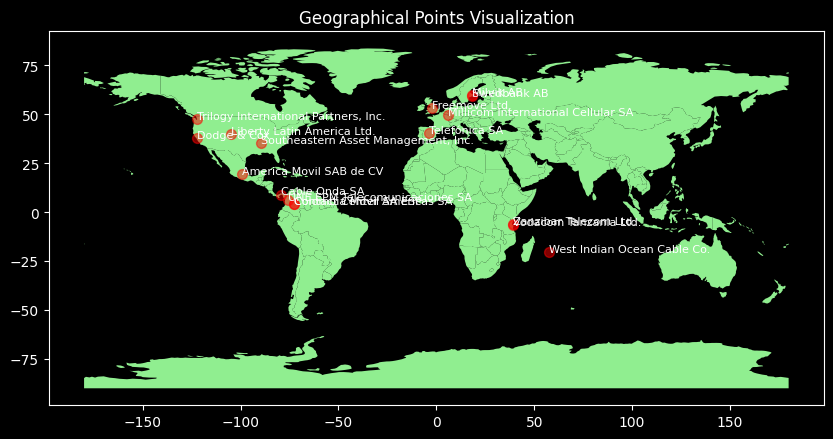

In [22]:

# Create a GeoDataFrame from the data
geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Load a world map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgreen')

# Plot the points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.5)

# Annotate the points with city names
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Name']):
    ax.text(x, y, label, fontsize=8)

# Show the plot
plt.title('Geographical Points Visualization')
plt.show()


In [23]:
gdf

,Latitude,Longitude,Name,Type,geometry
0,39.752471,-105.002570,Liberty Latin America Ltd.,COMPETES,POINT (-105.00257 39.75247)
1,19.443290,-99.202836,America Movil SAB de CV,COMPETES,POINT (-99.20284 19.44329)
2,40.514767,-3.663639,Telefónica SA,COMPETES,POINT (-3.66364 40.51477)
3,-5.934764,39.284276,Zanzibar Telecom Ltd.,ULTIMATE_PARENT_OF,POINT (39.28428 -5.93476)
4,6.244338,-75.573553,UNE EPM Telecomunicaciones SA,ULTIMATE_PARENT_OF,POINT (-75.57355 6.24434)
5,4.099917,-72.908813,Colombia Móvil SA ESP,ULTIMATE_PARENT_OF,POINT (-72.90881 4.09992)
6,4.099917,-72.908813,Contact Center Americas SA,ULTIMATE_PARENT_OF,POINT (-72.90881 4.09992)
7,9.013583,-79.481905,Cable Onda SA,ULTIMATE_PARENT_OF,POINT (-79.48190 9.01358)
8,59.358158,17.974802,Swedbank AB,PARTNERS,POINT (17.97480 59.35816)
9,35.100267,-89.850297,"Southeastern Asset Management, Inc.",PARTNERS,POINT (-89.85030 35.10027)


In [40]:
import plotly.express as px

## TODO: Rewrite the code to use plotly go.

fig = px.scatter_geo(gdf,
                    lat=gdf.geometry.y,
                    lon=gdf.geometry.x,
                    hover_name="Name",
                    color = gdf.Type,
                    scope='world',
                    projection='natural earth',
                    symbol=gdf.Type,
                    )

fig.update_layout(title = "Companies with locations")
fig.show()
